,name,total_length_months,yearly_interest_rate,bond_price,bond_rebuy_price,interest_period_months,early_redeem_penalty,capitalize_interest
0,EDO0335,120,<function <lambda> at 0x7052e34cc860>,100.0,100.0,12,3.0,True
1,OTS0625,3,0.03,100.0,90.9,3,0.0,False
2,COI0329,48,0.063,100.0,90.9,12,2.0,False
3,TOS0328,36,0.0595,100.0,90.9,12,1.0,True
4,ROR0326,12,0.0575,100.0,90.9,1,0.5,False
5,DOR0327,24,0.059,100.0,90.9,1,0.7,False


,EDO0335,OTS0625,COI0329,TOS0328,ROR0326,DOR0327
1,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,371.26,229.51
4,0.00,[KONIEC]607.50,0.00,0.00,759.38,627.76
5,0.00,607.50,0.00,0.00,1147.51,1026.01
6,0.00,607.50,0.00,0.00,1535.64,1424.26
7,0.00,607.50,0.00,0.00,1923.77,1822.52
8,0.00,[KONIEC]1218.64,0.00,0.00,2311.89,2220.77
9,0.00,1218.64,0.00,0.00,2700.02,2619.02
10,0.00,1218.64,0.00,0.00,3088.15,3017.27


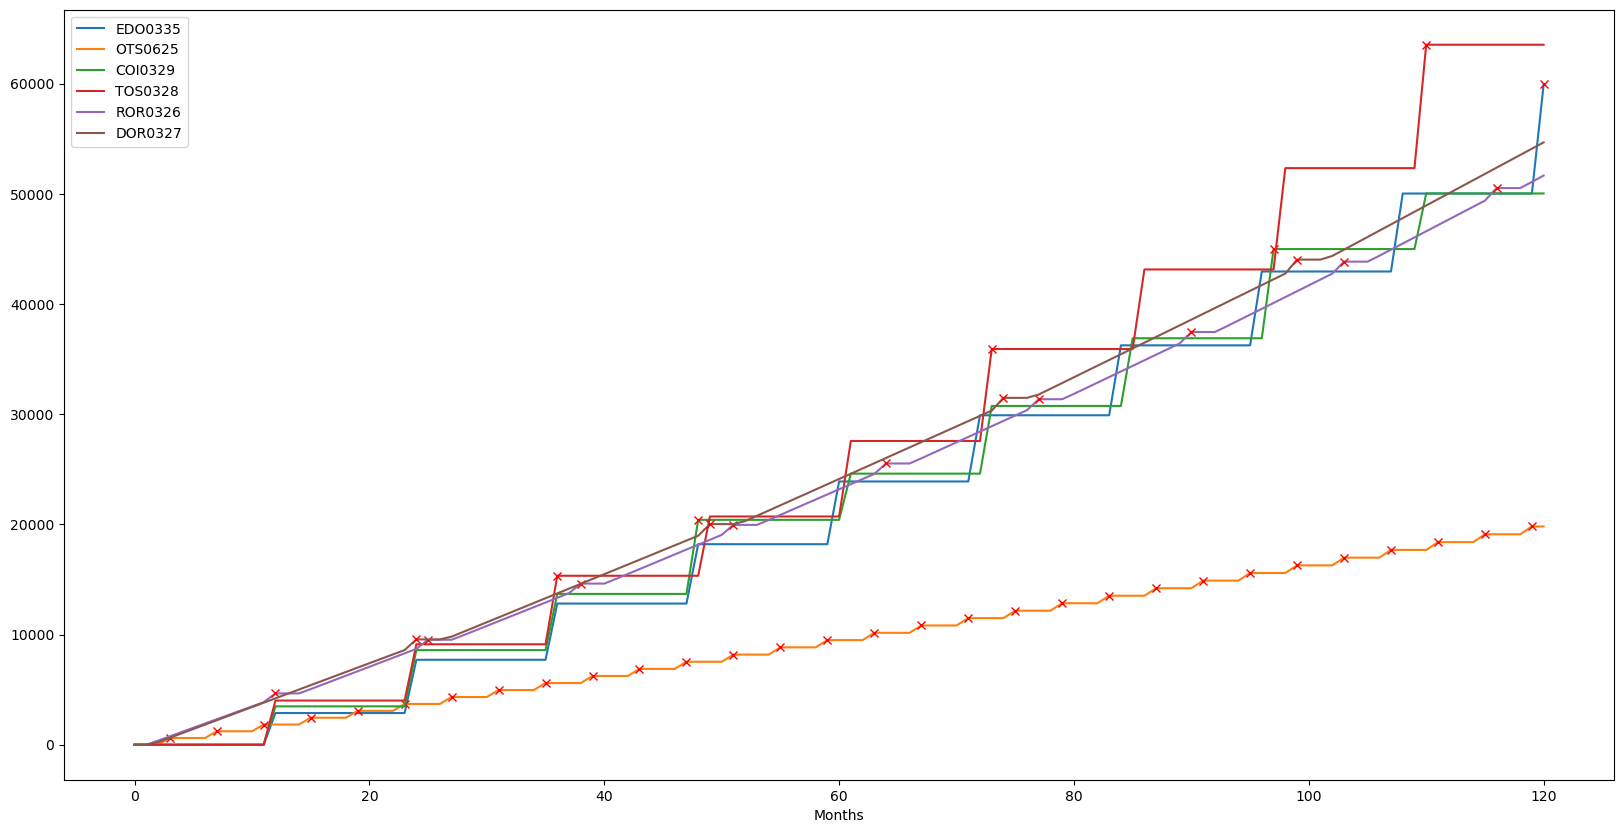

In [63]:
from dataclasses import dataclass
from typing import Optional, Union
import pandas as pd
import matplotlib.pyplot as plt

INTEREST_TAX = 0.19

INVESTMENT = 100_000.00

YEARLY_INFLATION_PERC = [3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6]
YEARLY_INFLATION = [perc / 100 for perc in YEARLY_INFLATION_PERC]
@dataclass
class TreasuryBondConfig:
    name: str
    total_length_months: int
    yearly_interest_rate: Union[float, callable]
    bond_price: float
    bond_rebuy_price: float
    interest_period_months: int
    early_redeem_penalty: float
    capitalize_interest: bool

BONDS = [
    TreasuryBondConfig(
        name="EDO0335",
        total_length_months=12 * 10,
        yearly_interest_rate=lambda month_idx: 0.0655 if month_idx <= 12 else YEARLY_INFLATION[month_idx // 12] + 0.02,
        bond_price=100.0,
        bond_rebuy_price=100.0,
        interest_period_months=12,
        early_redeem_penalty=3.00,
        capitalize_interest=True,
    ),
    TreasuryBondConfig(
        name="OTS0625",
        yearly_interest_rate=0.03,
        total_length_months=3,
        interest_period_months=3,
        bond_price=100.0,
        bond_rebuy_price=90.90,
        capitalize_interest=False,
        early_redeem_penalty=0.0,
    ),
    TreasuryBondConfig(
        name="COI0329",
        yearly_interest_rate=0.063,
        total_length_months=12*4,
        interest_period_months=12,
        bond_price=100.0,
        bond_rebuy_price=90.90,
        capitalize_interest=False,
        early_redeem_penalty=2.0,
    ),
    TreasuryBondConfig(
        name="TOS0328",
        yearly_interest_rate=0.0595,
        total_length_months=12*3,
        interest_period_months=12,
        bond_price=100.0,
        bond_rebuy_price=90.90,
        capitalize_interest=True,
        early_redeem_penalty=1.0,
    ),
    TreasuryBondConfig(
        name="ROR0326",
        yearly_interest_rate=0.0575,
        total_length_months=12,
        interest_period_months=1,
        bond_price=100.0,
        bond_rebuy_price=90.90,
        capitalize_interest=False,
        early_redeem_penalty=0.50,
    ),
    TreasuryBondConfig(
        name="DOR0327",
        yearly_interest_rate=0.0590,
        total_length_months=2*12,
        interest_period_months=1,
        bond_price=100.0,
        bond_rebuy_price=90.90,
        capitalize_interest=False,
        early_redeem_penalty=0.70,
    ),

]



# Display a table of the bonds
bonds_df = pd.DataFrame(BONDS)
# convert decimals to floats for display
display(bonds_df)


@dataclass
class BondState:
    name: str
    curr_month_idx: int
    investment_value: float # Current investment value
    profit: float # Profit calculation for one period (without tax yet)
    taxed_profit: float = 0.0 # Already taxed profits from previous periods
    bond_count: int = 0 # Number of bonds owned


states = [
    BondState(
        name=bond.name,
        curr_month_idx=0,
        investment_value=INVESTMENT,
        profit=0.0,
        bond_count=INVESTMENT // bond.bond_price
    )
    for bond in BONDS
]

CALC_MONTHS = 12 * 10 + 1

# Create a table with the results. It should contain the investment value for each month for each bond
results = {}
for state in states:
    # Create array of 0s
    results[state.name] = [0] * CALC_MONTHS

results_num = {}
for state in states:
    # Create array of 0s
    results_num[state.name] = [0] * CALC_MONTHS

results_endings = {}
for state in states:

    results_endings[state.name] = [False] * CALC_MONTHS

for month_idx in range(CALC_MONTHS):
    for state in states:
        bond = next(bond for bond in BONDS if bond.name == state.name)
        if state.curr_month_idx % bond.interest_period_months == 0 and state.curr_month_idx != 0:
            interest_rate = bond.yearly_interest_rate
            if callable(interest_rate):
                interest_rate = interest_rate(state.curr_month_idx)
            interest = bond.interest_period_months / 12.0 * interest_rate * state.investment_value  
            # interest = interest * (1 - INTEREST_TAX)
            interest = round(interest, 2)
            if bond.capitalize_interest:
                state.investment_value += interest
            state.profit += interest
        
        profit = state.profit
        has_penalty = False
        if state.curr_month_idx < bond.total_length_months:
            # Early redeem
            profit -= bond.early_redeem_penalty * state.bond_count
            profit = max(profit, 0.0)
            has_penalty = True
        

          
        profit_after_tax = profit * (1 - INTEREST_TAX)
        results[state.name][month_idx] = "{}{:.2f}".format("" if has_penalty else " [KONIEC]", profit_after_tax + state.taxed_profit)
        results_num[state.name][month_idx] = profit_after_tax + state.taxed_profit
        state.curr_month_idx += 1
        if not has_penalty: # Bond has ended, move profit to investment
            state.taxed_profit += profit_after_tax
            # Simulate buying the bonds again
            new_investment_value = state.investment_value + profit_after_tax
            state.bond_count = new_investment_value // bond.bond_price
            state.investment_value = state.bond_count * bond.bond_price
            state.profit = 0.0
            state.curr_month_idx = 0
            results_endings[state.name][month_idx] = True




results_pd = pd.DataFrame(results)
pd.options.display.max_rows = 999
# start from 1
results_pd.index += 1
display(results_pd)


# Display as a chart
plt.figure(figsize=(20, 10))
for state in states:
    # color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(results_num[state.name], label=state.name)
    # Draw a cross where the bond ends, with the same color
    for idx, end in enumerate(results_endings[state.name]):
        if end:
            plt.plot(idx, results_num[state.name][idx], 'rx')
plt.xlabel("Months")
plt.legend()
plt.show()
    